## İş Uygulaması: Bahşiş ve Ödenen Hesap Arasındaki İlişki:  
## Korelasyon Analizi   

Bahşiş ile ödenen hesap arasında korelasyon var mı?

H0: p = 0 (ilişki yoktur)  
H1: p !=0 (ilişki vardır)


### Bahşiş Veri Set:  

* total_bill  => yemeğin toplam fiyati (bahşiş ve vergiler dahil)  
* tip => bahşiş  
* sex => ücreti ödeyen kişinin cinsiyeti (0=Male, 1=Female)  
* smoker => grupta sigara içen var mı? (0=Hayır, 1=Evet)  
* day => gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)  
* time => ne zaman? (0=Day, 1=Night)  
* size => grupta kaç kişi var?    


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Toplam tutara, bahşiş ve vergiler dahil olduğu için öncelikle bunu düzenlememiz gerek.

In [3]:
df["total_bill"] = df["total_bill"] - df["tip"]

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


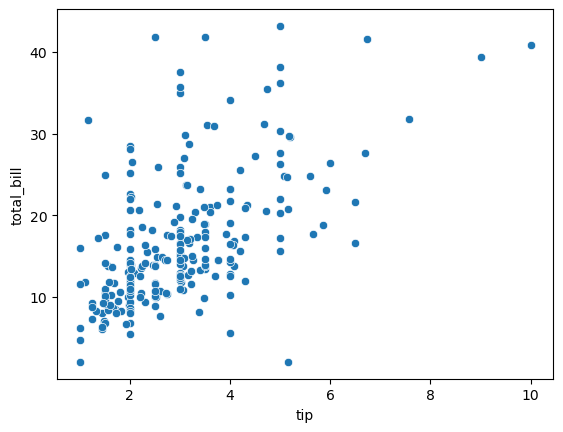

In [4]:
sns.scatterplot(x = "tip", y = "total_bill", data = df);

Veri Görselleştirme kullanarak ön inceleme gerçekleştirdiğimizde görüyoruz ki  
Bahşiş arttıkça toplam fatura da artmaktadır. Buradan ön çıkarım yapmak mümkündür.  
Varsayımlar ve Hipotez testleri ile bunu netleştirelim...

## Varsayım Kontrolü

In [17]:
from scipy.stats import shapiro

In [6]:
test_istatistigi, pValue = shapiro(df["tip"])
'Test_Istatisigi = %.4f  ,  pValue = %.4f'  %  (test_istatistigi, pValue)

'Test_Istatisigi = 0.8978  ,  pValue = 0.0000'

In [7]:
test_istatistigi, pValue = shapiro(df["total_bill"])
'Test_Istatisigi = %.4f  ,  pValue = %.4f'  %  (test_istatistigi, pValue)

'Test_Istatisigi = 0.9136  ,  pValue = 0.0000'

İki değişken için de Normallik Varsayımı sağlanamamıştır.      
pValue < 0.05  
H0 hipotezi reddedilmiştir.  

Örnek Dağılım ve Teorik Dağılım arasında anlamlı bir farklılık vardır.  
Yani Korelasyondan söz edilebilir 

## Parametrik Testler
Projenin bu kısmında Normallik Varsayımı sağlanmış farzederek işlemlere devam edeceğiz.  

Daha sonrasında none-parametric olarak asıl işleme geçerek devam edeceğiz.  

## Hipotez Testleri

#### Korelasyon Katsayısı

In [8]:
df["tip"].corr(df["total_bill"])   

## corr fonksiyonu ön tanımlı olarak Pearson katsayısını göstermektedir.
## Pearson katsayısı ise ancak değişkenler için Normallik Varsayımı sağlandığında verilmektedir. 
## Fakat bizim testlerimiz sonucunda Normallik Varsayımı reddedilmiştir. 

0.5766634471096374

In [9]:
df["tip"].corr(df["total_bill"], method="spearman")   

# Bir method aracılığıyla "Spearman" korelasyon katsayısını almalıyız.
# Spearman katsayısı, normallik varsayımı sağlanamadığında kullanılmaktadır. 

0.593691939408997

## Korelasyon Anlamlılığı Testi

In [10]:
from scipy.stats import pearsonr

In [11]:
korelasyon_katsayisi, pValue = pearsonr(df["tip"], df["total_bill"])
( ' korelasyon_katsayisi = %.4f , pValue = %.4f '   %    (korelasyon_katsayisi,pValue))

' korelasyon_katsayisi = 0.5767 , pValue = 0.0000 '

## None-Parametric Hipotez Testi  

Varsayım Kontrolleri sağlanmadığı durumlarda Spearmen ya da kendalltau kullanılması gerekmektedir.  
Bizim projemizde de varsayım kontrolleri sağlanmadığından dolayı bu işlemlere aslında spearman ile devam etmeliydik.  
Bu bölümde Spearmen kullanarak gerçek sonuçlara ulaşacağız.  

In [12]:
from scipy.stats import spearmanr

In [13]:
spearmanr(df["tip"], df["total_bill"])

SignificanceResult(statistic=0.593691939408997, pvalue=1.2452285137560276e-24)

In [14]:
korelasyon_katsayisi, pValue = spearmanr(df["tip"], df["total_bill"])
( ' korelasyon_katsayisi = %.4f , pValue = %.4f '   %    (korelasyon_katsayisi,pValue))

' korelasyon_katsayisi = 0.5937 , pValue = 0.0000 '

pValue < 0.05 olduğu için H0 Hipotezi Reddedilmiştir.  

Korelasyon Katsayısı ise 0.5937  çıkmıştır.

0.5937  pozitif ve orta güçlükte bir korelasyon değeridir, bu da iki değişken arasında pozitif bir ilişki olduğunu gösterir.  
Yani, bir değişken arttığında diğer değişken de artma eğilimindedir.

## KendalTau Yöntemi (Bir diğer none-parametric yöntem)

In [15]:
from scipy.stats import kendalltau

In [16]:
korelasyon_katsayisi, pValue = kendalltau(df["tip"], df["total_bill"])
( ' korelasyon_katsayisi = %.4f , pValue = %.4f '   %    (korelasyon_katsayisi,pValue))

' korelasyon_katsayisi = 0.4401 , pValue = 0.0000 '